In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [24]:
#importing dataset
data=pd.read_csv("./cleaned_dataset/data/00003.csv")

In [25]:
#summarise the data
data.describe()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      1621 non-null   float64
 1   Current_measured      1621 non-null   float64
 2   Temperature_measured  1621 non-null   float64
 3   Current_charge        1621 non-null   float64
 4   Voltage_charge        1621 non-null   float64
 5   Time                  1621 non-null   float64
dtypes: float64(6)
memory usage: 76.1 KB


(1621, 6)

In [26]:
data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516


0    6436.141
1    6426.781
2    6412.860
3    6399.735
4    6386.516
Name: RUL, dtype: float64
Epoch 1/20


c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.2271 - val_loss: 0.0612
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0730 - val_loss: 0.0476
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0407 - val_loss: 0.0108
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0175 - val_loss: 0.0062
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0094 - val_loss: 0.0130
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0135 - val_loss: 0.0064
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0098 - val_loss: 0.0043
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0056 - val_loss: 8.0573e-04
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 1

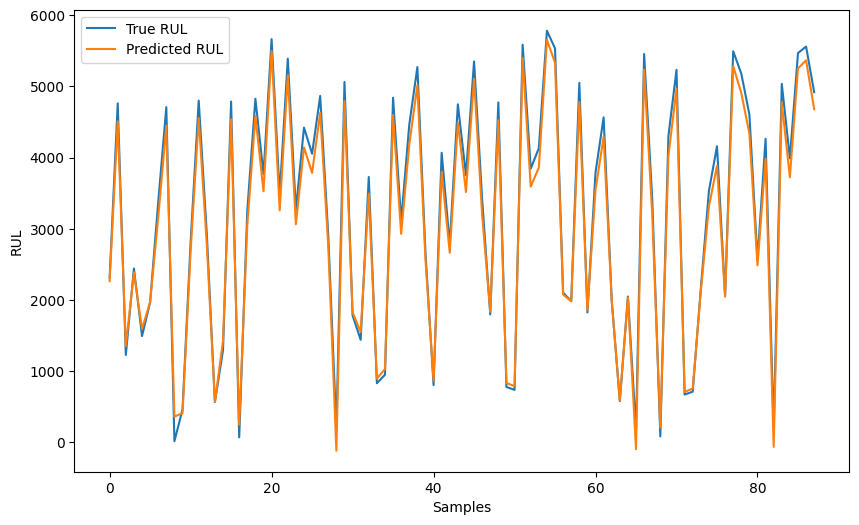

In [28]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
file_path = './cleaned_dataset/data/00001.csv'
data = pd.read_csv(file_path)

# Calculate Remaining Useful Life (RUL)
data['RUL'] = data['Time'].max() - data['Time']

print(data['RUL'].head())

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM input
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length, :-1]
        y = data[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 50
X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict RUL on test data
y_pred = model.predict(X_test)

# Rescale the predicted and true values back to original scale
y_test_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], data.shape[1] - 1)), y_pred)))[:, -1]

# Plot true vs predicted RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True RUL')
plt.plot(y_pred_rescaled, label='Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()





In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict RUL on test data
y_pred = model.predict(X_test)

# Rescale the predicted and true values back to the original scale
y_test_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], data.shape[1] - 1)), y_pred)))[:, -1]

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error (MAE): 174.58696856852433
Root Mean Squared Error (RMSE): 198.9438969843281
